# Chương 9: Các chủ đề nâng cao và Tương lai của Phân tích dữ liệu

**Mục tiêu:** Giới thiệu các kỹ thuật phân tích cho các dạng dữ liệu đặc thù (dữ liệu bị kiểm duyệt theo thời gian) và so sánh tư duy Thống kê đa biến truyền thống với Machine Learning hiện đại.

---

## 9.1. Phân tích Sống sót (Survival Analysis)

### Case Study: Khi nào khách hàng sẽ rời bỏ?
Ở Chương 3 (Hồi quy Logistic), chúng ta đã trả lời câu hỏi: *"Khách hàng có rời bỏ không?"* (Yes/No).
Nhưng câu hỏi quan trọng hơn với bộ phận CSKH là: *"Khi nào họ sẽ rời bỏ?"* và *"Xác suất họ ở lại sau 12 tháng là bao nhiêu?"*.

**Vấn đề của Hồi quy thông thường:**
Dữ liệu có tính **Kiểm duyệt (Censoring)**. Ví dụ: Tại thời điểm chốt sổ dữ liệu, khách hàng A vẫn đang dùng dịch vụ (chưa rời bỏ). Nếu ta coi thời gian tồn tại của họ là X tháng thì chưa chính xác, vì họ có thể sống sót thêm nhiều tháng nữa. Survival Analysis giải quyết vấn đề này.

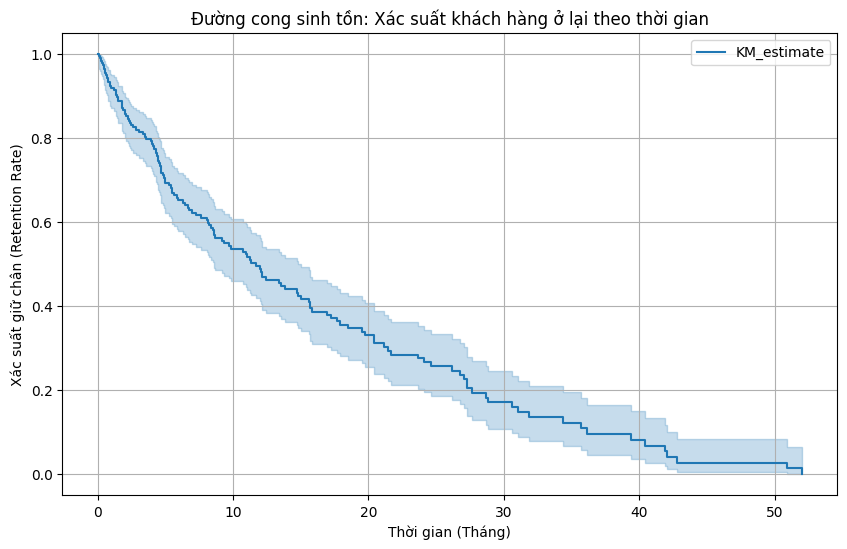

In [2]:
# Cần cài thư viện lifelines: !pip install lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# --- GIẢ LẬP DỮ LIỆU KHÁCH HÀNG VIỄN THÔNG ---
np.random.seed(42)
n_subs = 200

# 'T': Thời gian khách hàng đã gắn bó (tháng)
T = np.random.exponential(12, n_subs)  # Trung bình 12 tháng

# 'E': Sự kiện rời bỏ (1: Đã rời bỏ, 0: Vẫn đang dùng - Censored)
# Giả sử 30% khách hàng vẫn đang dùng dịch vụ tại thời điểm khảo sát
E = np.random.binomial(1, 0.7, n_subs)

df_survival = pd.DataFrame({'Time_Months': T, 'Churn_Event': E})

# --- VẼ ĐƯỜNG CONG SINH TỒN (KAPLAN-MEIER) ---
kmf = KaplanMeierFitter()
kmf.fit(durations=df_survival['Time_Months'], event_observed=df_survival['Churn_Event'])

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Đường cong sinh tồn: Xác suất khách hàng ở lại theo thời gian')
plt.ylabel('Xác suất giữ chân (Retention Rate)')
plt.xlabel('Thời gian (Tháng)')
plt.grid()
plt.show()

**Diễn giải:**
* Tại thời điểm t=0, xác suất giữ chân là 1.0 (100%).
* Đường cong giảm dần theo thời gian. Nếu đường cong dốc đứng $\rightarrow$ Khách hàng rời bỏ rất nhanh.
* Chúng ta có thể dùng kiểm định **Log-Rank Test** để so sánh đường sinh tồn của 2 nhóm (VD: Khách hàng dùng gói VIP vs Gói thường).

---

## 9.2. Thống kê Đa biến vs. Machine Learning

Cuốn sách này tập trung vào các mô hình thống kê (Regression, PCA, Factor Analysis). Tuy nhiên, trong kỷ nguyên AI, các bạn sẽ thường xuyên nghe đến Random Forest, XGBoost, Neural Networks.

### Sự khác biệt cốt lõi
1.  **Thống kê Đa biến (Multivariate Statistics):** 
    * **Mục tiêu:** Hiểu mối quan hệ (Inference). 
    * **Ưu điểm:** Giải thích được *tại sao* (VD: Hệ số $\beta$ cho biết X tăng 1 thì Y tăng bao nhiêu).
    * **Nhược điểm:** Giả định khắt khe (tuyến tính, chuẩn hóa).

2.  **Machine Learning (Học máy):**
    * **Mục tiêu:** Dự báo chính xác (Prediction).
    * **Ưu điểm:** Xử lý tốt dữ liệu phi tuyến, tương tác phức tạp, không cần giả định nhiều.
    * **Nhược điểm:** Hộp đen (Black-box), khó giải thích lý do.

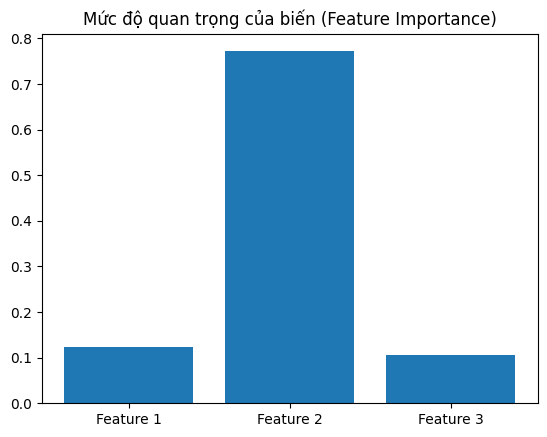

R-squared trên tập Test: 0.9511593013765799


In [3]:
# --- VÍ DỤ: RANDOM FOREST (MÔ HÌNH PHI TUYẾN) ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Dùng lại dữ liệu giá nhà ở Chương 3 (Giả sử mối quan hệ phức tạp hơn)
# Tạo dữ liệu giả lập phi tuyến tính
X = np.random.rand(200, 3) # 3 biến đặc điểm nhà
y = (X[:, 0]**2) + np.sin(X[:, 1]*5) + X[:, 2] + np.random.normal(0, 0.1, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Chạy Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Xem mức độ quan trọng của các biến (Feature Importance)
# Đây là cách ML "giải thích" dữ liệu
importances = rf_model.feature_importances_
plt.bar(['Feature 1', 'Feature 2', 'Feature 3'], importances)
plt.title('Mức độ quan trọng của biến (Feature Importance)')
plt.show()

print("R-squared trên tập Test:", rf_model.score(X_test, y_test))

## 9.3. Lời kết cho cuốn sách

Chúc mừng bạn đã hoàn thành hành trình qua 9 chương của **"Phân tích dữ liệu đa biến ứng dụng"**.

Chúng ta đã đi từ những viên gạch đầu tiên (Ma trận, Làm sạch dữ liệu) đến các mô hình dự báo (Hồi quy), giảm chiều (PCA, EFA) và phân nhóm (Clustering).

**Lời khuyên cuối cùng:**
1.  **Dữ liệu luôn thắng thuật toán:** Dành 80% thời gian để hiểu và làm sạch dữ liệu (Chương 2).
2.  **Đơn giản là đỉnh cao:** Luôn bắt đầu bằng mô hình đơn giản nhất (Hồi quy tuyến tính) trước khi dùng đến Neural Network.
3.  **Bối cảnh là vua:** Một con số $R^2$ cao vô nghĩa nếu nó không giải quyết được bài toán kinh doanh cụ thể.

Hẹn gặp lại các bạn trong những dự án dữ liệu thực tế!